<a href="https://colab.research.google.com/github/s-grzhang/gwc-k-nearest/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Reshape the data to 2D arrays (each image is 28x28 pixels)
train_X = train_X.reshape(-1, 28*28)
test_X = test_X.reshape(-1, 28*28)

# Normalize the data to have values between 0 and 1
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X.astype(np.float64))
test_X = scaler.transform(test_X.astype(np.float64))

# Initialize the KNN classifier with k=3 (you can change the value of k)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier
knn.fit(train_X, train_y)

# Predict using the trained model
test_pred = knn.predict(test_X)

# Calculate the accuracy
accuracy = accuracy_score(test_y, test_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Accuracy: 94.52%


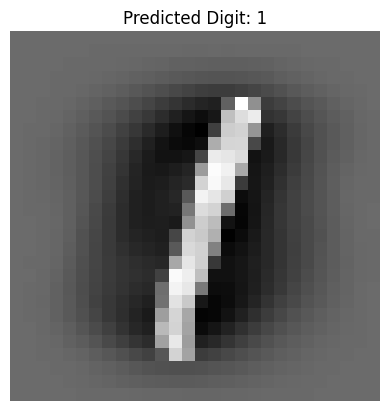

In [5]:
import matplotlib.pyplot as plt
def predict_digit(image):
    """
    Predict the digit represented by the input image.

    Parameters:
    image (numpy array): A 28x28 numpy array representing an MNIST digit.

    Returns:
    int: The predicted digit.
    """
    # Reshape the image to a 1D array of 784 pixels
    image = image.reshape(1, -1)

    # Normalize the image
    image = scaler.transform(image.astype(np.float64))

    # Predict the digit
    prediction = knn.predict(image)

    return prediction[0]

# Example usage: Predict the digit for the first test image
sample_image = test_X[5].reshape(28, 28)  # Reshape back to 28x28 to simulate an input image
predicted_digit = predict_digit(sample_image)

# Display the image
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')  # Turn off axis labels
plt.show()